refer to:
- [超实用的7种 pytorch 网络可视化方法](https://blog.csdn.net/Wenyuanbo/article/details/118937790)
- https://bhosmer.github.io/mm/ref.html todo
- [如何可视化 PyTorch 模型](https://dl.ypw.io/visualize-pytorch-model/)

**summary**

| 工具 | 是否可用 | 备注 |
| :- | :-: | :- | 
| [torchview](https://github.com/mert-kurttutan/torchview) | &#10004; | 可展示每个节点的输入和输出 size
| [Netron](https://github.com/lutzroeder/Netron) | &#10004; | 与 torchview 相比, 1) 无法展示输入和输出 size; 2)输入需要转为字典; 3) device 无法选择"meta"
| [wandb](https://github.com/wandb/wandb?tab=readme-ov-file) | &#10004; | 适用于追踪训练记录
| [tensorboardX](https://github.com/lanpa/tensorboardX) | todo | 
| [TensorWatch](https://github.com/microsoft/tensorwatch) | &#10008; | 需要的 torch 的版本很低
| [PyTorchViz](https://github.com/szagoruyko/pytorchviz) | &#10008; | 可视化为反向传播的路径, 不是模型结构, 未测试
| [HiddenLayer](https://github.com/waleedka/hiddenlayer) | &#10008; | 同上

# [torchview](https://github.com/mert-kurttutan/torchview)
## 安装

In [ ]:
! pip install -q torchview
! pip install -q -U graphviz

## 结构
There are 3 types of nodes:
1) <font color="orange">Tensor</font> Node: This node is represented by bright <font color="orange">yellow</font> color. `tensor-name` can take 3 values input-tensor, hidden-tensor, or output-tensor. Depth is the depth of tensor in hierarchy of modules.
2) <font color="blue">Function</font> Node: This node is represented by bright <font color="blue">blue</font> color.
3) <font color="green">Module</font> Node: This node is represented by bright <font color="green">green</font> color.

## 函数详解

In [ ]:
def draw_graph(
    model: nn.Module,
    input_data: INPUT_DATA_TYPE | None = None,
    input_size: INPUT_SIZE_TYPE | None = None,
    graph_name: str = 'model',
    depth: int | float = 3,
    device: torch.device | str | None = None,
    dtypes: list[torch.dtype] | None = None,
    mode: str | None = None,
    strict: bool = True,
    expand_nested: bool = False,
    graph_dir: str | None = None,
    hide_module_functions: bool = True,
    hide_inner_tensors: bool = True,
    roll: bool = False,
    show_shapes: bool = True,
    save_graph: bool = False,
    filename: str | None = None,
    directory: str = '.',
    **kwargs: Any,
) -> ComputationGraph:
    '''Returns visual representation of the input Pytorch Module with
    ComputationGraph object. ComputationGraph object contains:
    使用 ComputationGraph 对象返回输入 Pytorch 模块的可视化表示. ComputationGraph 对象包含:

    1) Root nodes (usually tensor node for input tensors) which connect to all
    the other nodes of computation graph of pytorch module recorded during forward
    propagation.
    根节点(通常是输入张量的张量节), 连接到前向传播期间记录的 pytorch 模块计算图的所有其他节点.

    2) graphviz.Digraph object that contains visual representation of computation
    graph of pytorch module. This graph visual shows modules/ module hierarchy,
    torch_functions, shapes and tensors recorded during forward prop, for examples
    see documentation, and colab notebooks.
    graphviz.Digraph 对象包含 pytorch 模块计算图的可视化表示. 该图可视化地展示了前向传播期间记录的模块/模块层次结构、torch_functions、形状和张量

    Args:
        model (nn.Module):
            Pytorch model to represent visually.
            Pytorch 模型来直观地表示

        input_data (data structure containing torch.Tensor):
            input for forward method of model. Wrap it in a list for
            multiple args or in a dict or kwargs
            模型前向传播的输入. 将其包装在多个 args 的列表、dict 或 kwargs 中
            
        input_size (Sequence of Sizes):
            Shape of input data as a List/Tuple/torch.Size
            (dtypes must match model input, default is FloatTensors).
            Default: None
            输入数据的形状为 List/Tuple/torch.Size
            (dtype 必须与模型输入匹配, 默认为 FloatTensors)

        graph_name (str):
            Name for graphviz.Digraph object. Also default name graphviz file
            of Graph Visualization
            Default: 'model'
            graphviz.Digraph 对象的名称。也是图形可视化 graphviz 文件的默认名称

        depth (int):
            Upper limit for depth of nodes to be shown in visualization.
            Depth is measured how far is module/tensor inside the module hierarchy.
            For instance, main module has depth=0, whereas submodule of main module
            has depth=1, and so on.
            Default: 3
            可视化中显示的节点深度的上限。
            深度测量模块/张量在模块层次结构中的距离.
            例如, 主模块深度为 0, 主模块的子模块深度为 1, 依此类推.

        device (str or torch.device):
            Device to place and input tensors. Defaults to
            gpu if cuda is seen by pytorch, otherwise to cpu.
            Default: None
            放置和输入张量的设备. 如果 pytorch 发现 cuda, 则默认为 gpu, 否则为 cpu.

        dtypes (list of torch.dtype):
            Uses dtypes to set the types of input tensor if
            input size is given.
            如果给定输入大小, 则使用 dtypes 设置输入张量的类型.
            
        mode (str):
            Mode of model to use for forward prop. Defaults
            to Eval mode if not given
            Default: None
            用于前向传播的模型模式. 若未指定, 则默认为 Eval 模式

        strict (bool):
            if true, graphviz visual does not allow multiple edges
            between nodes. Mutiple edge occurs e.g. when there are tensors
            from module node to module node and hiding those tensors
            Default: True
            如果为 true, 则 graphviz visual 不允许节点之间存在多个边. 例如, 当模块节点之间存在张量并隐藏这些张量时, 会出现多个边
        
        expand_nested(bool):
            if true shows nested modules with dashed borders
            如果为 true, 则显示带虚线边框的嵌套模块

        graph_dir (str):
            Sets the direction of visual graph
            'TB' -> Top to Bottom
            'LR' -> Left to Right
            'BT' -> Bottom to Top
            'RL' -> Right to Left
            Default: None -> TB
            设置可视化图的方向

        hide_module_function (bool):
            Determines whether to hide module torch_functions. Some
            modules consist only of torch_functions (no submodule),
            e.g. nn.Conv2d.
            True => Dont include module functions in graphviz
            False => Include modules function in graphviz
            Default: True
            确定是否隐藏模块 torch_functions. 某些模块仅包含 torch_functions (无子模块), 例如 nn.Conv2d.

        hide_inner_tensors (bool):
            Inner tensor is all the tensors of computation graph
            but input and output tensors
            True => Does not show inner tensors in graphviz
            False => Shows inner tensors in graphviz
            Default: True
            内部张量是计算图中除输入和输出张量之外的其他所有张量

        roll (bool):
            If true, rolls recursive modules.
            Default: False
            如果为真, 则滚动递归模块.

        show_shapes (bool):
            True => Show shape of tensor, input, and output
            False => Dont show
            Default: True

        save_graph (bool):
            True => Saves output file of graphviz graph
            False => Does not save
            Default: False

        filename (str):
            name of the file to store dot syntax representation and
            image file of graphviz graph. Defaults to graph_name
            存储点语法表示的文件名, 及 graphviz 图的图像文件名. 默认为 graph_name
            
        directory (str):
            directory in which to store graphviz output files.
            Default: .
            存储 graphviz 输出文件的路径.

    Returns:
        ComputationGraph object that contains visualization of the input
        pytorch model in the form of graphviz Digraph object
        ComputationGraph 对象, 包含(graphviz Digraph 对象形式的)输入 pytorch 模型的可视化
    '''

## example: resnet18

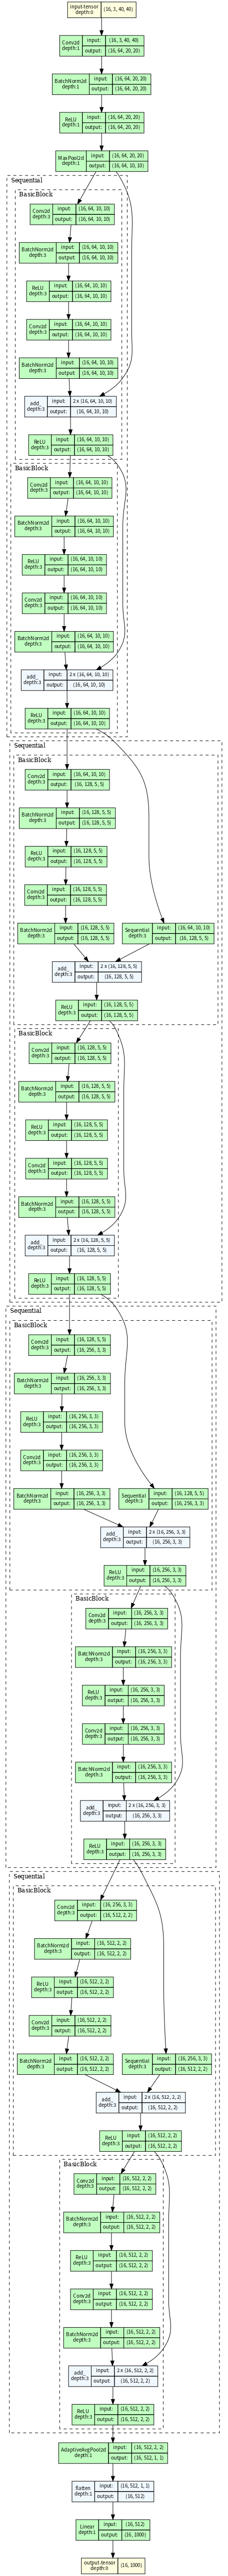

In [1]:
import torch
import graphviz
from torchview import draw_graph
from torchvision.models import resnet18, GoogLeNet, densenet, vit_b_16 # https://pytorch.org/vision/0.9/models.html

# when running on VSCode run the below command
# svg format on vscode does not give desired result
graphviz.set_jupyter_format('png')

model = resnet18()
args = torch.randn(16, 3, 40, 40)

model_graph = draw_graph(
    model,
    input_data=args,
    graph_name="resnet18",
    depth=3,
    device='meta',      # no memory is consumed for visualization
    expand_nested=True, # 显示带有虚线边框的嵌套模块
    save_graph=False,
)

# model_graph.resize_graph(scale=0.5) # 缩放
model_graph.visual_graph

如果遇到报错 AttributeError: module 'torch' has no attribute 'SymInt'
> 检查并更新 torch 版本为 2.2.0, `pip install torch==2.2.0`

ImportError: cannot import name 'sym_float' from 'torch' (unknown location)


## example: BLIP-2
**Notice**: based on transformers library in [OpenVLA](https://github.com/openvla/openvla) project

In [1]:
import torch
from transformers import AutoProcessor, Blip2ForConditionalGeneration, Blip2Model
from PIL import Image
import requests
from torchview import draw_graph

device = "meta" # 在 3090 上可选"meta", "cuda" 或 "cpu"
path_models = "/media/qj00182/DATA/downloads"
url = "https://img.sportsv.net/img/article/cover/4/112014/fit-6Mnko5Tz0J-945x495.jpg"

# 加载处理器, 并构建 inputs
processor = AutoProcessor.from_pretrained(path_models + "/blip2-opt-2.7b/")
image = Image.open(requests.get(url, stream=True).raw)
prompt = "Question: What are they doing? Answer:"
inputs = processor(images=image, text=prompt, padding=True, return_tensors="pt").to(device)

# 加载模型
model = Blip2ForConditionalGeneration.from_pretrained(path_models + "/blip2-opt-2.7b/", device_map=device)

2024-07-24 15:52:25.923146: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-24 15:52:25.944048: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 15:52:25.944067: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 15:52:25.944640: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-24 15:52:25.948109: I tensorflow/core/platform/cpu_feature_guar

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
model_graph = draw_graph(
    model,
    input_data=inputs,
    graph_name="BLIP-2",
    depth=3,
    device='meta',      # no memory is consumed for visualization
    expand_nested=True, # 显示带有虚线边框的嵌套模块
    save_graph=True,
)

# model_graph.visual_graph

In [3]:
model_graph = draw_graph(
    model.vision_model,
    input_data=inputs.pixel_values,
    graph_name="BLIP-2_vision_model",
    depth=3,
    device='meta',      # no memory is consumed for visualization
    expand_nested=True, # 显示带有虚线边框的嵌套模块
    save_graph=True,
)

# model_graph.visual_graph

# [Netron](https://github.com/lutzroeder/Netron)
refer to:
- [pytorch 网络可视化(五): netron](https://blog.csdn.net/Wenyuanbo/article/details/118736258)
- [pytorch可视化工具netron](https://www.cnblogs.com/jiangnanyanyuchen/p/13344217.html)

## 安装

In [ ]:
! pip install netron
! pip install onnx==1.16.1

## example: resnet18

In [2]:
import torch
import netron
from torchvision.models import resnet18

model = resnet18()
args = torch.randn(16, 3, 40, 40)
model_saving_path = "./resnet18.pth"

# 保存 pytorch 模型
torch.onnx.export(model, args, model_saving_path)
# 输出网络结构
netron.start(model_saving_path)  

Serving './resnet18.pth' at http://localhost:8080


('localhost', 8080)

## example: BLIP-2

In [3]:
import torch
from transformers import AutoProcessor, Blip2ForConditionalGeneration, Blip2Model
from PIL import Image
import requests
import netron

device = "cuda" # 在 3090 上可选"cuda" 或 "cpu", 如果选择 "meta"会报错
path_models = "/media/qj00182/DATA/downloads"
url = "https://img.sportsv.net/img/article/cover/4/112014/fit-6Mnko5Tz0J-945x495.jpg"

# 加载处理器, 并构建 inputs
processor = AutoProcessor.from_pretrained(path_models + "/blip2-opt-2.7b/")
image = Image.open(requests.get(url, stream=True).raw)
prompt = "Question: What are they doing? Answer:"
inputs = processor(images=image, text=prompt, padding=True, return_tensors="pt").to(device)

# 加载模型
model = Blip2ForConditionalGeneration.from_pretrained(path_models + "/blip2-opt-2.7b/", device_map=device)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
model_saving_path = "./blip2.pth"
args = {"pixel_values": inputs.pixel_values,
        "input_ids": inputs.input_ids,
        "attention_mask": inputs.attention_mask}

# 保存 pytorch 模型
torch.onnx.export(model, args, model_saving_path)
# 输出网络结构
netron.start(model_saving_path)

/home/qj00182/miniconda3/envs/openvla_3/lib/python3.10/site-packages/transformers/models/blip_2/modeling_blip_2.py:835: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if query_length > 0:
/home/qj00182/miniconda3/envs/openvla_3/lib/python3.10/site-packages/transformers/models/blip_2/modeling_blip_2.py:860: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attention_output.shape[1] > query_length:
/home/qj00182/miniconda3/envs/openvla_3/lib/python3.10/site-packages/transformers/models/opt/modeling_opt.py:826: TracerWarning: Converting a tensor to a Python

Serving './blip2.pth' at http://localhost:8080


('localhost', 8080)

# [tensorboardX](https://github.com/lanpa/tensorboardX)
- pip install tensorboardX
- [pytorch 网络可视化(四)：tensorboardX](https://blog.csdn.net/Wenyuanbo/article/details/118605418)
